 # Session 4 — Paragraph-Level Analysis
## Measure 3: Discourse Marker Density per Paragraph

### What are Discourse Markers?

**Discourse markers** are special words or phrases that show how sentences connect to each other. Think of them as **road signs in writing** - they tell readers what's coming next and how it relates to what came before.

**Common examples:**
- **"However"** → signals that something contrasts with what was just said
  - *"I love coffee. However, I can't drink it at night."*
- **"Therefore"** → shows cause and effect
  - *"It's raining. Therefore, we'll stay inside."*
- **"For example"** → introduces a specific instance
  - *"Many animals hibernate. For example, bears sleep through winter."*
- **"Meanwhile"** → indicates something happening at the same time
  - *"Alice explored Wonderland. Meanwhile, her sister read quietly."*

### Why Count Discourse Markers?

**The Simple Idea:**
Some writers use lots of these signpost words (formal, academic writing), while others use very few (casual conversation, fiction). By counting them, we can:
1. Understand an author's writing style
2. Compare different texts or genres
3. Identify which parts of a book are more structured vs. more narrative

**Real-World Examples:**
- **Academic papers**: HIGH density (lots of "however", "therefore", "moreover")
- **Children's stories**: LOW density (simple sentences, few transitions)
- **News articles**: MEDIUM density (clear but not overly formal)

### What This Notebook Does:

**Step 1**: Load both Alice books and split them into paragraphs

**Step 2**: For each paragraph, count how many discourse markers appear:
- We have a list of 19 common markers (like "however", "meanwhile", "suddenly")
- We count how many times these words appear in each paragraph
- We calculate **density** = number of markers ÷ total words in paragraph

**Step 3**: Visualize the results:
- **Scatter plots**: See if longer paragraphs use more/fewer markers
- **Histograms**: Compare the overall patterns between the two books

**Step 4**: Interpret what we find about Carroll's writing style

### Connection to Modern AI (ChatGPT, etc.):

**How AI Uses This:**

When you use ChatGPT or similar AI systems, they understand your text by recognizing patterns like discourse markers. Here's how:

1. **During Training**: 
   - AI learns that "however" usually introduces contrast
   - "Therefore" usually shows logical conclusion
   - "For example" introduces a specific case
   - This helps AI understand the **structure** of arguments and narratives

2. **During Use**:
   - When you write "However" in your prompt, ChatGPT knows you're changing direction
   - RAG systems (which search documents to answer questions) can find well-structured paragraphs that use clear markers
   - AI-generated text often includes these markers to sound more natural and organized

3. **Practical Example**:
   - **Without markers**: *"It's cold. Bring a jacket."* (AI might not see the connection)
   - **With markers**: *"It's cold. Therefore, bring a jacket."* (AI clearly sees cause → effect)

**Why This Matters for Your Learnings:**
- If you're building a chatbot, knowing about discourse markers helps you structure responses
- If you're analyzing customer reviews, marker density tells you if feedback is casual or structured
- If you're working with RAG (document search), you can identify high-quality, well-organized source documents

This notebook shows a simple version of what complex AI does automatically!

In [1]:
import re
from typing import List, Tuple
import matplotlib.pyplot as plt

def load_book(filepath: str) -> str:
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()

    if 'CHAPTER I' in text:
        start = text.find('CHAPTER I')
        text = text[start:]
    elif '*** START OF' in text:
        start = text.find('*** START OF')
        text = text[start + 100:]

    if '*** END OF' in text:
        end = text.find('*** END OF')
        text = text[:end]
    elif 'End of Project Gutenberg' in text:
        end = text.find('End of Project Gutenberg')
        text = text[:end]

    return text.strip()

# Load the "Crime-punishment.txt" and "The-Brotherskaramazov.txt" files
crime_punishment_text = load_book('../data/Crime-punishment.txt')
brothers_karamazov_text = load_book('../data/The-Brotherskaramazov.txt')

# Print the number of characters in each text
print(f"Crime and Punishment characters: {len(crime_punishment_text):,}")
print(f"The Brothers Karamazov characters: {len(brothers_karamazov_text):,}")


Crime and Punishment characters: 1,224,428
The Brothers Karamazov characters: 1,956,237


In [2]:
def split_into_paragraphs(text: str, min_words: int = 10) -> List[str]:
    text = text.replace('\r\n', '\n').replace('\r', '\n')
    raw_paras = re.split(r'\n\s*\n+', text)
    paras = []
    for p in raw_paras:
        cleaned = re.sub(r'\s+', ' ', p).strip()
        if not cleaned:
            continue
        if len(cleaned.split()) < min_words:
            continue
        paras.append(cleaned)
    return paras

DISCOURSE_MARKERS = [
    'however', 'therefore', 'moreover', 'meanwhile', 'suddenly',
    'although', 'though', 'even though', 'in contrast', 'on the other hand',
    'for example', 'for instance', 'at the same time', 'finally',
    'in conclusion', 'nevertheless', 'nonetheless', 'instead', 'after all'
]

def count_markers(paragraph: str) -> int:
    text = paragraph.lower()
    count = 0
    for m in DISCOURSE_MARKERS:
        count += text.count(m)
    return count

def marker_density(paragraphs: List[str]) -> Tuple[list, list]:
    densities = []
    lengths = []
    for p in paragraphs:
        n_words = len(re.findall(r"\w+", p))
        if n_words == 0:
            continue
        markers = count_markers(p)
        densities.append(markers / n_words)
        lengths.append(n_words)
    return densities, lengths

# Split the new text files into paragraphs
crime_punishment_paras = split_into_paragraphs(crime_punishment_text)
brothers_karamazov_paras = split_into_paragraphs(brothers_karamazov_text)

# Calculate marker density for both texts
cp_dens, cp_len = marker_density(crime_punishment_paras)
bk_dens, bk_len = marker_density(brothers_karamazov_paras)

# Print the mean discourse markers per word
print(f"Crime and Punishment mean discourse markers per word: {sum(cp_dens)/len(cp_dens):.5f}")
print(f"The Brothers Karamazov mean discourse markers per word: {sum(bk_dens)/len(bk_dens):.5f}")

Crime and Punishment mean discourse markers per word: 0.00621
The Brothers Karamazov mean discourse markers per word: 0.00681


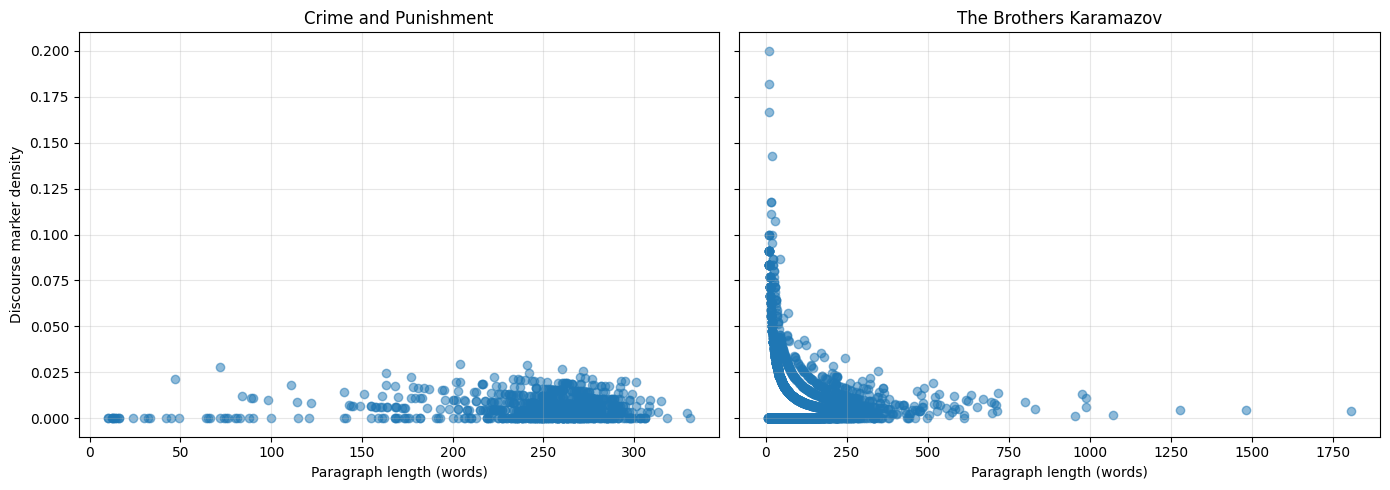

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for Crime and Punishment
axes[0].scatter(cp_len, cp_dens, alpha=0.5)
axes[0].set_title('Crime and Punishment')
axes[0].set_xlabel('Paragraph length (words)')
axes[0].set_ylabel('Discourse marker density')
axes[0].grid(True, alpha=0.3)

# Plot for The Brothers Karamazov
axes[1].scatter(bk_len, bk_dens, alpha=0.5)
axes[1].set_title('The Brothers Karamazov')
axes[1].set_xlabel('Paragraph length (words)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Why are several different paths visible?

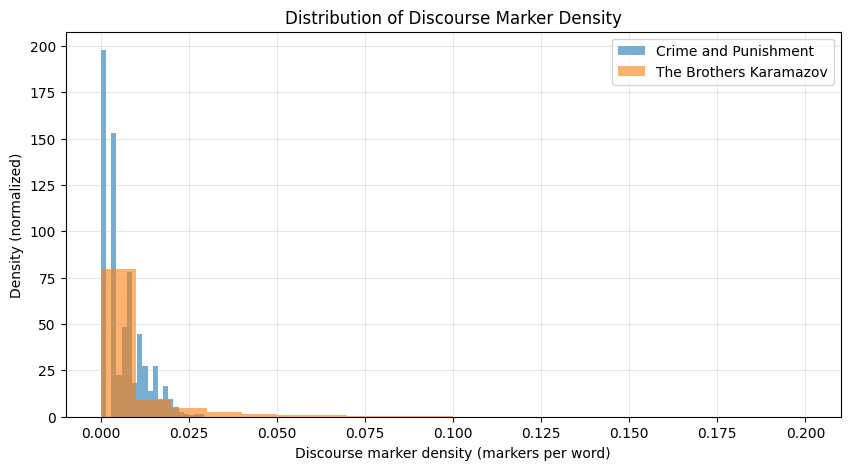

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the histograms for Crime and Punishment and The Brothers Karamazov
ax.hist(cp_dens, bins=20, alpha=0.6, label='Crime and Punishment', density=True)
ax.hist(bk_dens, bins=20, alpha=0.6, label='The Brothers Karamazov', density=True)

# Set labels and title
ax.set_xlabel('Discourse marker density (markers per word)')
ax.set_ylabel('Density (normalized)')
ax.set_title('Distribution of Discourse Marker Density')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()


#### Histogram (Distribution Comparison)

**What you're seeing:**
- This shows HOW COMMON different density levels are
- **X-axis**: Marker density ranges
- **Y-axis**: How frequently that density occurs (normalized so both books are comparable)

**Key Observations:**

1. **Tall Peak Near Zero**:
   - The huge spike at the left (around 0.00) means MOST paragraphs have zero or very few markers
   - Both books are dominated by simple, direct narrative prose

2. **Long Right Tail**:
   - The gradual decline to the right shows that higher densities are increasingly rare
   - Very few paragraphs exceed 0.04 density

3. **Both Books Overlap Almost Perfectly**:
   - The blue (Wonderland) and orange (Looking-Glass) distributions are nearly identical
   - This confirms Carroll had a very consistent writing style

**What Would Be Different?**
- **Academic paper**: Would have a peak around 0.02-0.04 (much higher)
- **News article**: Peak around 0.01-0.02 (moderate)
- **Children's book (like this)**: Peak at 0.00-0.01 (low, as we see)

---

### What This Tells Us About Lewis Carroll's Writing

1. **Narrative-First Style**: Carroll focuses on storytelling through action and dialogue rather than explicit logical connections

2. **Accessible Language**: Low marker density makes the text easier to read - perfect for his young audience

3. **Consistent Voice**: Both books show identical patterns, suggesting a deliberate, polished style

4. **Strategic Marker Use**: The few high-density paragraphs likely mark important moments where Carroll wants to emphasize logical connections or contrasts

### Application to Your Own Projects

**If you're analyzing text:**
- High marker density → formal, structured, argumentative
- Low marker density → narrative, conversational, descriptive
- Use this to automatically classify text type or writing style

**If you're generating text (with AI or manually):**
- Fiction/stories: Keep density low (like Carroll)
- Explanations/tutorials: Use moderate density for clarity
- Academic/business: Use higher density for professional tone

## Memory Cleanup

If you're running low on memory, run this cell to free up RAM by deleting large variables.

In [5]:
import gc

# Delete large variables to free memory
del crime_punishment_text, brothers_karamazov_text
del crime_punishment_paras, brothers_karamazov_paras
del cp_dens, cp_len, bk_dens, bk_len

# Clear matplotlib figures
plt.close('all')

# Force garbage collection
gc.collect()

print("Memory cleaned! Large variables deleted and garbage collected.")

Memory cleaned! Large variables deleted and garbage collected.
